In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy
import seaborn as sns
import pandas as pd

In [2]:
sns.set_theme(
    context='paper', 
    palette='colorblind',
    style='whitegrid',
    rc={'text.usetex':True, 'mathtext.fontset':'cm'},
)

In [3]:
%matplotlib inline

# Recurrent Spiking Neural Network

In [4]:
from rsnn.rsnn.rsnn import Network

/Users/haguettaz/Documents/RSNN/src/rsnn/rsnn/rsnn.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [14]:
num_neurons = 10

# inputs
num_synapses = 500
synaptic_decay = 3 # synaptic time constant c_k, e.g., 1/5 ms
somatic_decay = 5 # somatic time constant c_0, e.g., 1/10 ms
weights_lim = (-0.25, 0.25)
delays_lim = (1.0, 10.0)

# spike generation
firing_threshold = 1.0

# refractoriness
hard_refractory_period = 5
soft_refractory_period = 5
soft_refractory_weight = 1.0

In [15]:
network = Network(num_neurons, num_synapses, firing_threshold, synaptic_decay, somatic_decay, delays_lim, hard_refractory_period, soft_refractory_period, soft_refractory_weight, weights_lim)    

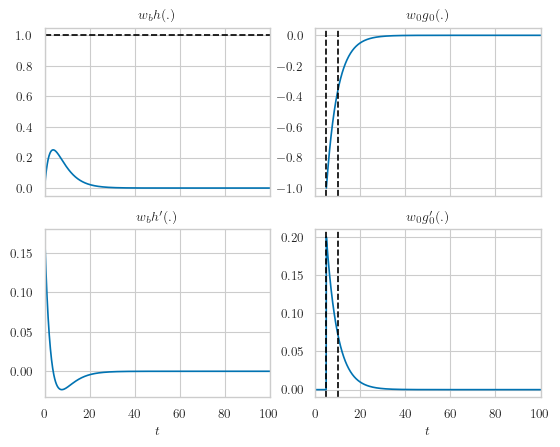

In [16]:
neuron = network.neurons[0]

t = np.linspace(0, 100, 1000)

fig, axes = plt.subplots(2, 2, sharex="all")

#axes[0,0].plot(t, neuron.weights_min * neuron.impulse_resp(t[:,None]), label="$-w_b h(t)$")
axes[0,0].plot(t, neuron.weights_max * neuron.impulse_resp(t[:,None]))
axes[0,0].axhline(neuron.firing_threshold, linestyle="--", color="black")
axes[0,0].set_title("$w_b h(.)$")

axes[0,1].plot(t, neuron.refractory_resp(t[:,None]))
axes[0,1].axvline(neuron.hard_refractory_period, linestyle="--", color="black")
axes[0,1].axvline(neuron.hard_refractory_period + neuron.soft_refractory_period, linestyle="--", color="black")
axes[0,1].set_title("$w_0 g_0(.)$")

#axes[1,0].plot(t, neuron.weights_min * neuron.impulse_resp_deriv(t[:,None]), label="$-w_b h'(t)$")
axes[1,0].plot(t, neuron.weights_max * neuron.impulse_resp_deriv(t[:,None]))
axes[1,0].set_title("$w_b h'(.)$")
axes[1,0].set_xlabel("$t$")
axes[1,0].set_xlim(0, 100)

axes[1,1].plot(t, neuron.refractory_resp_deriv(t[:,None]))
axes[1,1].axvline(neuron.hard_refractory_period, linestyle="--", color="black")
axes[1,1].axvline(neuron.hard_refractory_period + neuron.soft_refractory_period, linestyle="--", color="black")
axes[1,1].set_title("$w_0 g_0'(.)$")
axes[1,1].set_xlabel("$t$")
axes[1,1].set_xlim(0, 100)

plt.show()

In [17]:
from rsnn.rsnn.utils import get_stability_matrix

In [18]:
from rsnn.signals.spike_train import PeriodicSpikeTrain

In [19]:
period = 100
soft_refractory_period = 5
hard_refractory_period = 5
firing_rate = 0.1

In [20]:
spike_train = PeriodicSpikeTrain(num_neurons, period, firing_rate, hard_refractory_period, soft_refractory_period)

In [21]:
spike_train.random()

In [38]:
Phi = get_stability_matrix(network, spike_train)

  0%|          | 0/57 [00:00<?, ?it/s]

In [45]:
np.sort(np.abs(np.linalg.eigvals(Phi)))

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.51395792e-09, 1.57060307e-09,
       1.57060307e-09, 1.61722272e-09, 1.66990837e-09, 1.66990837e-09,
       1.70829545e-09, 1.70829545e-09, 1.73309363e-09, 1.73309363e-09,
       1.78061856e-09, 1.78061856e-09, 1.80215872e-09, 1.80922733e-09,
       1.80922733e-09, 1.87231975e-09, 1.89211738e-09, 1.89211738e-09,
       1.89381736e-09, 1.89381736e-09, 1.90492711e-09, 1.92283807e-09,
       1.92283807e-09, 1.92737435e-09, 1.92737435e-09, 1.94058193e-09,
       1.94058193e-09, 1.94849663e-09, 1.94849663e-09, 1.96129087e-09,
       1.96129087e-09, 1.97260097e-09, 1.97260097e-09, 1.98027915e-09,
       1.98027915e-09, 1.99207824e-09, 1.99207824e-09, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      